In [1]:
import os 
import sys
sys.path.append('../dependencies/')

import shutil
import flopy
# import specific FloPy modules
from flopy.utils.gridgen import Gridgen 
from flopy.utils.gridintersect import GridIntersect

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# for working with shapefiles
import shapefile as sf
from shapely.geometry import Polygon, LineString, MultiLineString, Point

print(f'Flopy version:{flopy.__version__}')

Flopy version:3.3.4


In [2]:
# define the location of the model working directory; this is where all the MF6 files will be written
# the folder path is relative to the location in which python is running. In our case, relative to the location of the jupyter notebok file.

# set the path to the history model
hist_workspace = os.path.join('..','models','sgn_model_1layer_transport')

# set the new workspace
workspace = os.path.join('..','models','sgn_model_1layer_scenario')

# make sure that the folder exists. If it doesn't, create it.
# copy the hisotry model to the new folder
if os.path.exists(workspace):
    shutil.rmtree(workspace)
shutil.copytree(hist_workspace, workspace)    
    
# the relative pathto the input file folder
datadir = os.path.join('..','data','sgn')

# the relative path to the executables folder
bindir = os.path.join('..','bin')

In [3]:
# load the model
sim = flopy.mf6.MFSimulation.load(sim_ws=workspace, verbosity_level=1)

print(sim.model_names)

loading simulation...
  loading simulation name file...
  loading tdis package...
  loading model gwf6...
    loading package disv...
    loading package ic...
    loading package npf...
    loading package rch...
    loading package riv...
    loading package drn...
    loading package wel...
    loading package ghb...
    loading package obs...
    loading package oc...
    loading package sto...
  loading model gwt6...
    loading package disv...
    loading package ic...
    loading package adv...
    loading package dsp...
    loading package mst...
    loading package ssm...
    loading package oc...
    loading package cnc...
    loading package obs...
  loading exchange package gwf-gwt_exg_0...
  loading ims package sgn...
  loading ims package gwt-sgn...
odict_keys(['sgn', 'gwt-sgn'])


In [4]:
gwf = sim.get_model("sgn")

In [5]:
# GridIntersect works by first calling an intersect object on the model grid:
ix = GridIntersect(gwf.modelgrid)

In [6]:
# hydraulic barrier data
barrier_xy = Point(1519614., 5031870.)
print(barrier_xy)

inj_rate = -30/1000 #30 l/s to m3/s

POINT (1519614 5031870)


In [7]:
# ineresect all model cells
barrier_cell = ix.intersect(barrier_xy).cellids

In [8]:
gwf.wel.stress_period_data

{internal}
(rec.array([((0, 4736),  0.    , 'well-p1_ln\x00'),
           ((0, 4735),  0.    , 'well-p2_ln\x00'),
           ((0, 4742),  0.    , 'well-p3_ln\x00'),
           ((0, 4739),  0.    , 'well-p4_ln\x00'),
           ((0, 5138),  0.    , 'well-p5_ln\x00'),
           ((0, 5561),  0.    , 'well-p6_ln\x00'),
           ((0, 5991),  0.    , 'well-p7_ln\x00'),
           ((0, 5977),  0.    , 'well-p8_ln\x00'),
           ((0, 5547),  0.    , 'well-p9_ln\x00'),
           ((0, 5544),  0.    , 'well-p10_ln\x00'),
           ((0, 5527),  0.    , 'well-p11_ln\x00'),
           ((0, 10012),  0.    , 'well-r1_ln\x00'),
           ((0, 10025),  0.    , 'well-r2_ln\x00'),
           ((0, 10543),  0.    , 'well-r3_ln\x00'),
           ((0, 10555),  0.    , 'well-r4_ln\x00'),
           ((0, 10568),  0.    , 'well-r5_ln\x00'),
           ((0, 11076),  0.    , 'well-r6_ln\x00'),
           ((0, 11083),  0.    , 'well-r7_ln\x00'),
           ((0, 11096),  0.    , 'well-r8_ln\x00'),
         

In [9]:
# append the barrier wells to the wel package SPD
for i in barrier_cell:
    gwf.wel.stress_period_data.append_data([((0, i), inj_rate, 'hydraulic_barrier')])

In [10]:
# check if that worked; see the end of the array
gwf.wel.stress_period_data

{internal}
(rec.array([((0, 4736),  0.    , 'well-p1_ln\x00'),
           ((0, 4735),  0.    , 'well-p2_ln\x00'),
           ((0, 4742),  0.    , 'well-p3_ln\x00'),
           ((0, 4739),  0.    , 'well-p4_ln\x00'),
           ((0, 5138),  0.    , 'well-p5_ln\x00'),
           ((0, 5561),  0.    , 'well-p6_ln\x00'),
           ((0, 5991),  0.    , 'well-p7_ln\x00'),
           ((0, 5977),  0.    , 'well-p8_ln\x00'),
           ((0, 5547),  0.    , 'well-p9_ln\x00'),
           ((0, 5544),  0.    , 'well-p10_ln\x00'),
           ((0, 5527),  0.    , 'well-p11_ln\x00'),
           ((0, 10012),  0.    , 'well-r1_ln\x00'),
           ((0, 10025),  0.    , 'well-r2_ln\x00'),
           ((0, 10543),  0.    , 'well-r3_ln\x00'),
           ((0, 10555),  0.    , 'well-r4_ln\x00'),
           ((0, 10568),  0.    , 'well-r5_ln\x00'),
           ((0, 11076),  0.    , 'well-r6_ln\x00'),
           ((0, 11083),  0.    , 'well-r7_ln\x00'),
           ((0, 11096),  0.    , 'well-r8_ln\x00'),
         

In [11]:
sim.write_simulation()

writing simulation...
  writing simulation name file...
  writing simulation tdis package...
  writing ims package sgn...
  writing ims package gwt-sgn...
  writing package gwf-gwt_exg_0...
  writing model sgn...
    writing model name file...
    writing package disv...
    writing package ic...
    writing package npf...
    writing package rch_obs...
    writing package rch...
    writing package riv_obs...
    writing package riv_0...
    writing package drn_obs...
    writing package drn_0...
    writing package wel_obs...
    writing package wel_0...
INFORMATION: maxbound in ('gwf6', 'wel', 'dimensions') changed to 144 based on size of stress_period_data
    writing package ghb_obs...
    writing package ghb_0...
    writing package obs_5...
    writing package oc...
    writing package sto...
  writing model gwt-sgn...
    writing model name file...
    writing package disv...
    writing package ic...
    writing package adv...
    writing package dsp...
    writing package mst

In [12]:
sim.run_simulation()

FloPy is using the following  executable to run the model: D:\Workspace\hugm0001\programs\mf6.2.1\mf6.2.1\bin\mf6.exe
                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                            VERSION 6.2.1 02/18/2021

   MODFLOW 6 compiled Feb 18 2021 08:24:05 with IFORT compiler (ver. 19.10.2)

This software has been approved for release by the U.S. Geological 
Survey (USGS). Although the software has been subjected to rigorous 
review, the USGS reserves the right to update the software as needed 
pursuant to further analysis and review. No warranty, expressed or 
implied, is made by the USGS or the U.S. Government as to the 
functionality of the software and related material nor shall the 
fact of release constitute any such warranty. Furthermore, the 
software is released on condition that neither the USGS nor the U.S. 
Government shall be held liable for any damages resulting from its 
authorized or unauthorized use. Al

(True, [])

In [13]:
fname = os.path.join(workspace, gwf.name + '.hds')
hdobj = flopy.utils.HeadFile(fname, model=gwf)
head = hdobj.get_alldata()

hmin = head.min()
hmax = head.max()

print(f'Max head in model run: {hmax}')
print(f'Min head in model run: {hmin}')

head.shape

Max head in model run: 103.02477675864966
Min head in model run: 97.08266028422362


(1, 1, 1, 19131)

<AxesSubplot:title={'center':'data Layer 1'}>

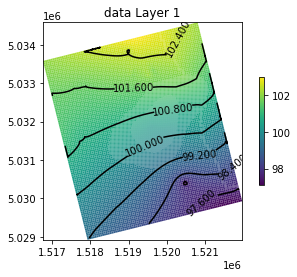

In [14]:
# get the times at which values are recorede in the heads file
hdtimes = hdobj.get_times()
# generic plot of head data
hdobj.plot(mflay=0, totim=hdtimes[0] ,colorbar=True, contour=True, clabel=True)

<AxesSubplot:title={'center':'data Layer 1'}>

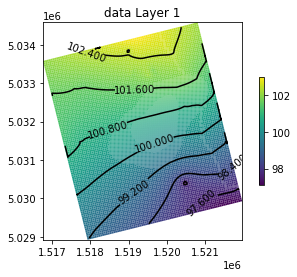

In [15]:
# Visualy compare effect of inkection well

#read the .hds file form the hisotry model
fname2 = os.path.join(hist_workspace, gwf.name + '.hds')
hist_hdobj = flopy.utils.HeadFile(fname2, model=gwf)
hist_hdobj.plot(mflay=0, totim=hdtimes[0] ,colorbar=True, contour=True, clabel=True)

In [16]:
hdobj.get_kstpkper()

[(3, 0)]

In [17]:
# read the grd file
deltah = hdobj.get_data(mflay=0, kstpkper=(3,0)) - hist_hdobj.get_data(mflay=0,  kstpkper=(3,0))

In [22]:
deltah[0].min()

-0.3321218032914288

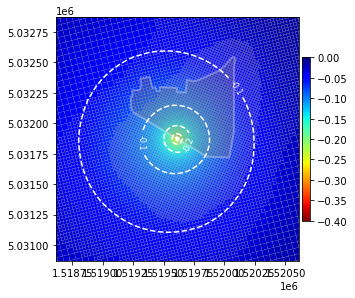

In [26]:
fig = plt.figure(figsize=(5, 5), tight_layout=True)
ax = fig.add_subplot(111, aspect='equal')

ext_offset = 1000
extent=(1519614-ext_offset, 1519614+ext_offset,
        5031870-ext_offset, 5031870+ext_offset)

mm = flopy.plot.PlotMapView(model=gwf, ax=ax, layer=0, extent=extent) 

# plot the model grid + fill contours
dh = mm.plot_array(edgecolor='grey', a=deltah[0], cmap='jet_r', alpha=1, linewidth=0.1, vmin=-0.4, vmax=0)
cb = plt.colorbar(dh, shrink=0.5, pad=0.01)

# plot isolines
levels = np.arange(-0.4, 0., 0.05)
cs = mm.contour_array(deltah[0], colors='white', levels=levels)
plt.clabel(cs, fmt='%.1f', colors='white', fontsize=8)

# plot the site shp
flopy.plot.plot_shapefile(sf.Reader(os.path.join(datadir, 'shp','Site_area.shp')), linewidth=2, facecolor='grey', edgecolor='w', alpha=0.3);

In [19]:
# Get the MF6 concentration output
fname_mf6 = os.path.join(workspace, list(sim.model_names)[1] + ".ucn")
ucnobj_mf6 = flopy.utils.HeadFile(fname_mf6, precision="double", text="CONCENTRATION")

# pre-hydraulic barrier simulation
fname_mf6 = os.path.join(hist_workspace, list(sim.model_names)[1] + ".ucn")
hist_ucnobj_mf6 = flopy.utils.HeadFile(fname_mf6, precision="double", text="CONCENTRATION")

# difference between them
deltac = ucnobj_mf6.get_data(mflay=0, kstpkper=(3,0)) - hist_ucnobj_mf6.get_data(mflay=0,  kstpkper=(3,0))

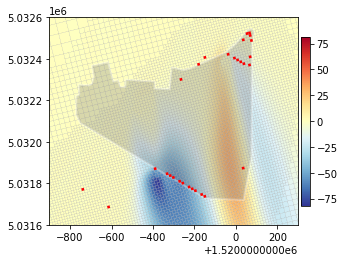

In [20]:
# differnece in concentration

fig = plt.figure(figsize=(5, 5), tight_layout=True)
ax = fig.add_subplot(111, aspect='equal')

extent=(1519100, 1520300, #xmin, xmax
        5031600, 5032600) #ymin, ymax

mm = flopy.plot.PlotMapView(model=gwf, ax=ax, layer=0, extent=extent) 

# plot the differnece in concnetration induced by the hydraulic barrier
a = deltac[0].copy()
vmax = abs(a).max()
vmin = -vmax

dc = mm.plot_array(edgecolor='grey', a=a, cmap='RdYlBu_r', alpha=1, linewidth=0.1, vmin=vmin, vmax=vmax)
cb = plt.colorbar(dc, shrink=0.5, pad=0.01)

# plot the site shp
flopy.plot.plot_shapefile(sf.Reader(os.path.join(datadir, 'shp','Site_area.shp')), linewidth=2, facecolor='grey', edgecolor='w', alpha=0.3);

# plot the well cells
wells = mm.plot_bc("WEL")